<a href="https://colab.research.google.com/github/ashraf-badalov/ml-projects/blob/master/boosting_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [61]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [62]:
data.shape

(1025, 14)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [64]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

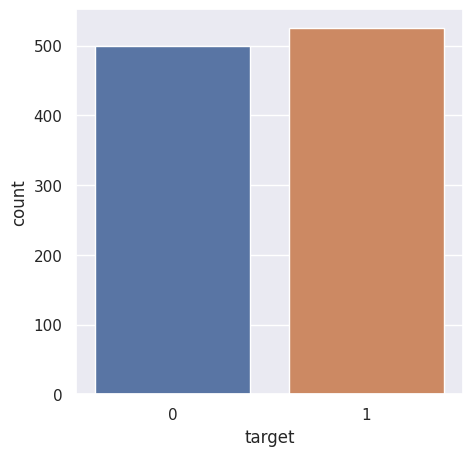

In [65]:
plt.figure(figsize=(5,5))
sns.set_theme()
sns.countplot(data=data, x='target')
plt.show()

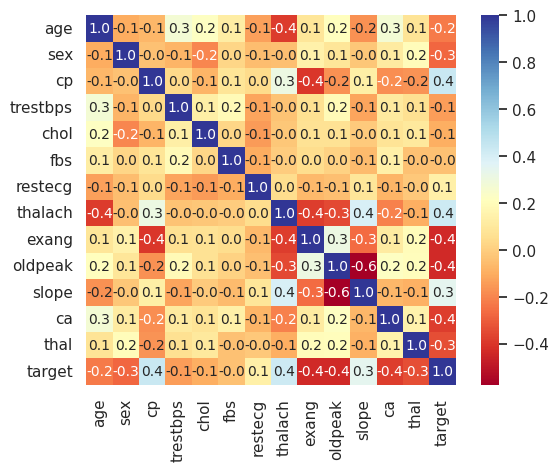

In [66]:
data_corr = data.corr()
sns.heatmap(data_corr, cbar=True, annot=True, square=True, fmt='.1f', annot_kws={'size':10}, cmap='RdYlBu')
plt.show()

In [67]:
X = data.drop(['target'], axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [94]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
print(f'Adaboost Accuracy Score: {accuracy_score(ada_pred, y_test)}')

Adaboost Accuracy Score: 0.9170731707317074


In [91]:
xgb = xgboost.XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(f"XGB Accuracy:{accuracy_score(y_pred, y_test)}")

XGB Accuracy:1.0


In [98]:
gbc = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(f"GBC Accuracy:{accuracy_score(y_pred, y_test)}")

GBC Accuracy:0.975609756097561


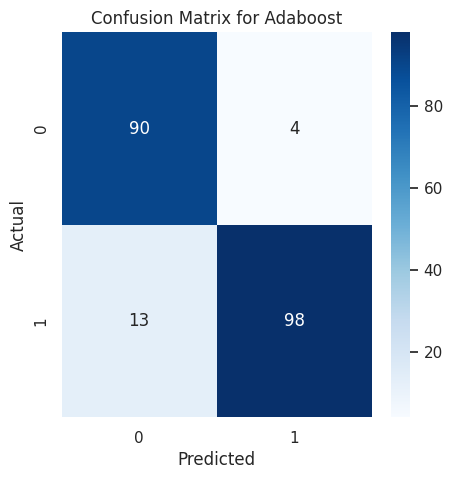

In [101]:
cm = confusion_matrix(ada_pred, y_test)

plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True,cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Adaboost")
plt.show()